## Subset East-Taylor domain from CONUS2 grid to gather PF-CLM input files

In [2]:
import subsettools as st
import hf_hydrodata as hf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from parflow.tools.io import read_pfb
from parflow.tools.io import read_pfb,write_pfb, read_clm

# hf.register_api_pin("email", "pin")

In [3]:
# get bounding box of east-taylor huc8
ij_huc_bounds_ET, mask_ET = st.define_huc_domain(hucs=["14020001"], grid="conus2") 
print(f"bounding box: {ij_huc_bounds_ET}")
nj = ij_huc_bounds_ET[3] - ij_huc_bounds_ET[1]
ni = ij_huc_bounds_ET[2] - ij_huc_bounds_ET[0]
print(f"nj: {nj}")
print(f"ni: {ni}")

bounding box: (1359, 1569, 1426, 1617)
nj: 48
ni: 67


In [5]:
# get mask for east-taylor domain - same for all WYs
mask_solid_paths = st.write_mask_solid(mask=mask_ET, grid="conus2", write_dir="~/EastTaylor_inputs/newbounds_1.5inc_WY2018")


masked_data = np.ma.masked_where(mask_ET == 0, mask_ET)
#np.ma.masked_where(mask_ET == 0, mask_ET)
# plt.imshow(masked_data, origin='lower', cmap = 'binary', vmax = 7, vmin = -1)
# plt.axis('off')
# plt.colorbar()
#masked_data.shape


Wrote mask.pfb
Wrote solidfile and mask_vtk with total z of 2000 meters


In [3]:
# read and write east-taylor forcing  
# change dates to desired water year, change filepath accordingly
filepaths = st.subset_forcing(
    ij_huc_bounds_ET,
    grid="conus2",
    start="2017-10-01",
    end="2018-10-01",
    dataset="CW3E",
    write_dir="~/EastTaylor_inputs/newbounds_1.5CW3E_WY2018",
)


Reading specific_humidity pfb sequence
Reading east_windspeed pfb sequence
Reading north_windspeed pfb sequence
Reading atmospheric_pressure pfb sequence
Reading air_temp pfb sequence
Reading downward_longwave pfb sequence
Reading precipitation pfb sequence
Reading downward_shortwave pfb sequence
Finished writing north_windspeed to folder
Finished writing air_temp to folder
Finished writing precipitation to folder
Finished writing specific_humidity to folder
Finished writing east_windspeed to folder
Finished writing downward_longwave to folder
Finished writing atmospheric_pressure to folder
Finished writing downward_shortwave to folder


(24, 48, 67)

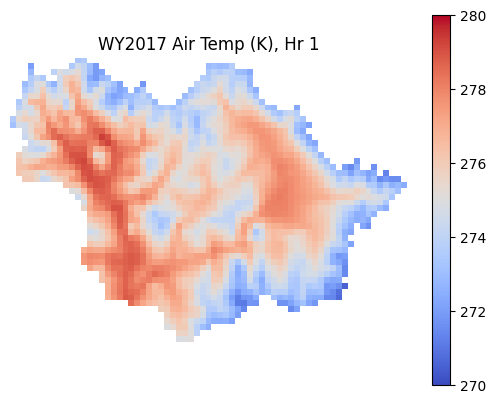

In [7]:
# visualize first temp timesteps
filename = '~/EastTaylor_inputs/newbounds_CW3E_WY2018/CW3E.Temp.000001_to_000024.pfb'  #filepaths["air_temp"][0]
data = read_pfb(filename)
plt.imshow(data[12, :, :]*masked_data, cmap="coolwarm", origin='lower', vmin = 270, vmax = 280)
plt.axis('off')
plt.title("WY2017 Air Temp (K), Hr 1")
plt.colorbar()
data.shape

In [8]:
# write static filepaths to desired directory
static_filepaths = st.subset_static(
    ij_huc_bounds_ET,
    dataset="conus2_domain",
    write_dir="~/EastTaylor_inputs/newbounds_WY2018",
    var_list=("slope_x", "slope_y", "pf_indicator", "pf_flowbarrier", "ss_pressure_head", "mannings"),
)

/tmp/ipykernel_2536574/1799551981.py:1: DeprecationWarning: Note that for subsettools versions >= 2.0.0, this function will raise a ValueError if a variable in var_list is not supported in the dataset. (In older versions, it just printed an error message and continued executing normally). You can check in the HydroData documentation which variables are contained in each dataset (https://hf-hydrodata.readthedocs.io/en/latest/available_data.html).
  static_filepaths = st.subset_static(


Wrote slope_x.pfb in specified directory.
Wrote slope_y.pfb in specified directory.
Wrote pf_indicator.pfb in specified directory.
Wrote pf_flowbarrier.pfb in specified directory.
Wrote ss_pressure_head.pfb in specified directory.
Wrote mannings.pfb in specified directory.


In [9]:
# subset and copy vegp, vegm, and drv files for clm
file_paths = st.config_clm(
   ij_huc_bounds_ET, 
    start="2017-10-01", 
    end="2018-10-01", 
    dataset="conus2_domain",
    write_dir="~/EastTaylor_inputs/newbounds_WY2018",
)

copied vegp
subset vegm
copied drv_clmin
edited drv_clmin


## Getting a DEM from hydrodata

In [4]:
options = {
      "dataset": "conus2_domain", "variable": "elevation", "grid_bounds": ij_huc_bounds_ET
}
dem = hf.get_gridded_data(options)

(48, 67)


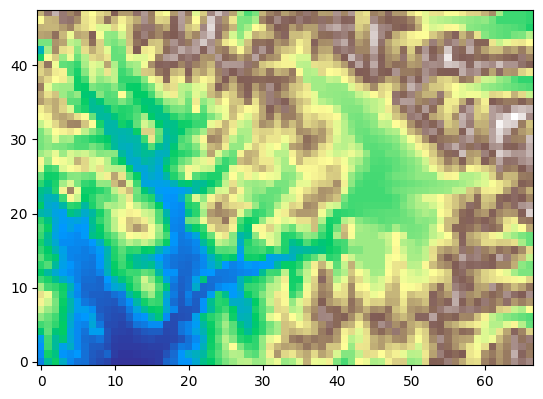

In [5]:
plt.imshow(dem, cmap="terrain", origin="lower")
print(dem.shape)

In [6]:
# saving with same processor topology and dz as runscript
write_pfb("~/EastTaylor_inputs/DEM_newbounds_EastTaylor.pfb", dem, p=4,
    q=4,
    r=1,
    x=0.0,
    y=0.0,
    z=0,
    dx=1000.0,
    dy=1000.0,
    dz=200.0)